In [17]:
import sys
print(sys.executable)

C:\Users\idowu\st_env\Scripts\python.exe


In [18]:
import sys
print(sys.version)

3.11.2 (tags/v3.11.2:878ead1, Feb  7 2023, 16:38:35) [MSC v.1934 64 bit (AMD64)]


In [19]:
import numpy as np
import pandas as pd
import sklearn
import xgboost
import imblearn
import joblib

print(np.__version__, pd.__version__, sklearn.__version__, xgboost.__version__, imblearn.__version__ , joblib.__version__)

1.25.2 2.3.2 1.7.1 3.0.4 0.14.0 1.5.1


In [20]:

import warnings
warnings.filterwarnings('ignore')


In [21]:
# Load dataset
df = pd.read_csv("mmc1.csv")

In [22]:
# Rename severe_maleria to severe_malaria
df = df.rename(columns={"severe_maleria": "severe_malaria"})

In [23]:
# Save the dataset back
df.to_csv("mmc1.csv", index=False)

In [24]:
#Check column head
df.head()

,age,age_group,sex,fever,cold,rigor,fatigue,headace,bitter_tongue,vomitting,diarrhea,Convulsion,Anemia,jundice,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,severe_malaria
0,3,1-10,1,1,1,0,1,1,1,0,1,1,0,1,1,1,0,0,0
1,3,1-10,0,1,1,1,1,1,1,0,1,0,0,0,1,1,0,0,0
2,3,1-10,0,1,1,1,1,1,0,0,1,1,0,0,1,1,0,0,1
3,4,1-10,1,1,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0
4,4,1-10,0,1,1,1,0,1,0,0,0,1,0,1,1,1,0,0,0


In [25]:
#shape of data 
#number of rows
#number of columns

print(f" Dataset shape: {df.shape}")
print(f" Number of patients: {df.shape[0]}")
print(f" Number of features: {df.shape[1]}")

 Dataset shape: (337, 19)
 Number of patients: 337
 Number of features: 19


In [26]:
# Checking for missing values
df.isnull().sum()

age               0
age_group         0
sex               0
fever             0
cold              0
rigor             0
fatigue           0
headace           0
bitter_tongue     0
vomitting         0
diarrhea          0
Convulsion        0
Anemia            0
jundice           0
cocacola_urine    0
hypoglycemia      0
prostraction      0
hyperpyrexia      0
severe_malaria    0
dtype: int64

In [27]:
# Summary statistics
df.describe()

,age,sex,fever,cold,rigor,fatigue,headace,bitter_tongue,vomitting,diarrhea,Convulsion,Anemia,jundice,cocacola_urine,hypoglycemia,prostraction,hyperpyrexia,severe_malaria
count,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000
mean,30.347181,0.534125,0.750742,0.566766,0.341246,0.483680,0.700297,0.403561,0.074184,0.338279,0.344214,0.350148,0.658754,0.540059,0.857567,0.219585,0.139466,0.344214
std,14.720853,0.499576,0.433227,0.496259,0.474833,0.500477,0.458809,0.491341,0.262460,0.473828,0.475818,0.477726,0.474833,0.499134,0.350014,0.414581,0.346947,0.475818
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,29.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,38.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,77.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
#Dividing the columns into dependent variables and independent variable(Outcome = Severe_malaria)
#dentify target variable and features

target_col = 'severe_malaria'  # target variable
feature_cols = [col for col in df.columns if col != target_col] # feature variables

print(f"\nTarget Variable: {target_col}")
print("Feature List:")
for i, feat in enumerate(feature_cols, 1):
    print(f" Feature Variables:  {i:2d}. {feat}")


Target Variable: severe_malaria
Feature List:
 Feature Variables:   1. age
 Feature Variables:   2. age_group
 Feature Variables:   3. sex
 Feature Variables:   4. fever
 Feature Variables:   5. cold
 Feature Variables:   6. rigor
 Feature Variables:   7. fatigue
 Feature Variables:   8. headace
 Feature Variables:   9. bitter_tongue
 Feature Variables:  10. vomitting
 Feature Variables:  11. diarrhea
 Feature Variables:  12. Convulsion
 Feature Variables:  13. Anemia
 Feature Variables:  14. jundice
 Feature Variables:  15. cocacola_urine
 Feature Variables:  16. hypoglycemia
 Feature Variables:  17. prostraction
 Feature Variables:  18. hyperpyrexia


In [30]:
import matplotlib.pyplot as plt

# Count how many patients are in each class (0 = negative, 1 = positive)
target_counts = df[target_col].value_counts()


In [31]:
# Calculate the proportion (%) of each class
target_props = df[target_col].value_counts(normalize=True)

In [32]:
# Print distribution of severe malaria in terms of count and percentage
print("Severe Malaria Distribution:")
print(f"  Negative (0): {target_counts[0]} patients ({target_props[0]*100:.1f}%)")
print(f"  Positive (1): {target_counts[1]} patients ({target_props[1]*100:.1f}%)")

Severe Malaria Distribution:
  Negative (0): 221 patients (65.6%)
  Positive (1): 116 patients (34.4%)


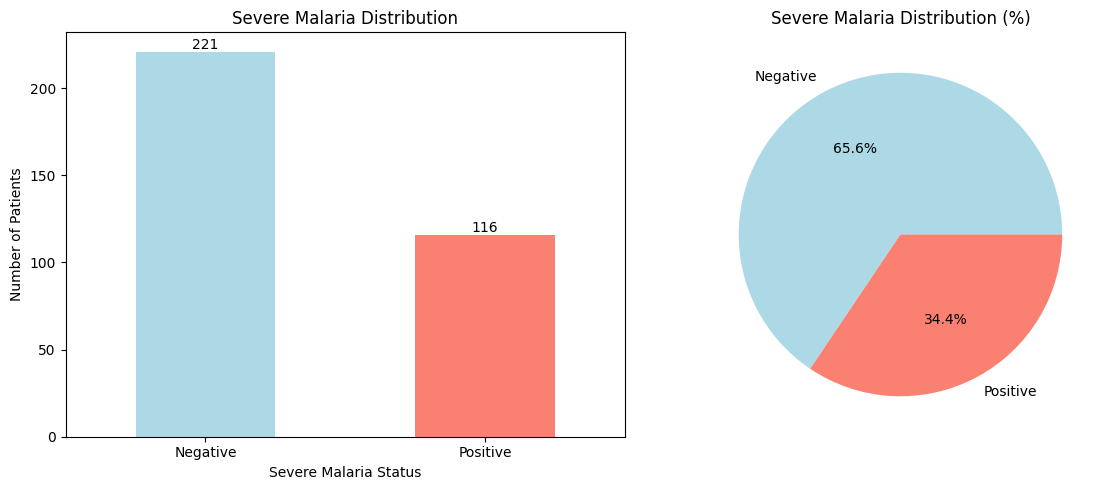

In [33]:
# Create visualization for target distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart
bars = target_counts.plot(kind='bar', ax=axes[0], color=['lightblue', 'salmon'])
axes[0].set_title('Severe Malaria Distribution')
axes[0].set_xlabel('Severe Malaria Status')
axes[0].set_ylabel('Number of Patients')
axes[0].set_xticklabels(['Negative', 'Positive'], rotation=0)

# Add labels on top of each bar
for p in axes[0].patches:
    axes[0].annotate(f"{int(p.get_height())}", 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha='center', va='bottom', fontsize=10, color='black')

# Pie chart
axes[1].pie(target_counts.values, labels=['Negative', 'Positive'], 
           autopct='%1.1f%%', colors=['lightblue', 'salmon'])
axes[1].set_title('Severe Malaria Distribution (%)')

plt.tight_layout()
plt.show()


In [34]:
#  Age Analysis
print("Age Statistics:")
# Get summary statistics for age
age_stats = df['age'].describe()
for stat, value in age_stats.items():
    print(f"  {stat.capitalize()}: {value:.2f}")


Age Statistics:
  Count: 337.00
  Mean: 30.35
  Std: 14.72
  Min: 3.00
  25%: 19.00
  50%: 29.00
  75%: 38.00
  Max: 77.00


In [35]:
# Compare age distribution between patients with and without severe malaria
print("\nAge Distribution by Severe Malaria Status:")
age_by_target = df.groupby(target_col)['age'].describe()
print(age_by_target)


Age Distribution by Severe Malaria Status:
                count       mean        std  min   25%   50%   75%   max
severe_malaria                                                          
0               221.0  29.687783  15.159074  3.0  18.0  29.0  38.0  77.0
1               116.0  31.603448  13.824288  3.0  21.0  31.0  39.0  76.0


In [36]:
#  Gender Analysis 
print("\nGender Distribution:")
# Count how many females (0) and males (1)
gender_counts = df['sex'].value_counts()
print(f"  Female (0): {gender_counts[0]} patients ({gender_counts[0]/len(df)*100:.1f}%)")
print(f"  Male (1): {gender_counts[1]} patients ({gender_counts[1]/len(df)*100:.1f}%)")



Gender Distribution:
  Female (0): 157 patients (46.6%)
  Male (1): 180 patients (53.4%)


In [37]:
# --- Gender Analysis ---
print("\nGender Distribution:")
# Count how many females (0) and males (1)
gender_counts = df['sex'].value_counts()
print(f"  Female (0): {gender_counts[0]} patients ({gender_counts[0]/len(df)*100:.1f}%)")
print(f"  Male (1): {gender_counts[1]} patients ({gender_counts[1]/len(df)*100:.1f}%)")



Gender Distribution:
  Female (0): 157 patients (46.6%)
  Male (1): 180 patients (53.4%)


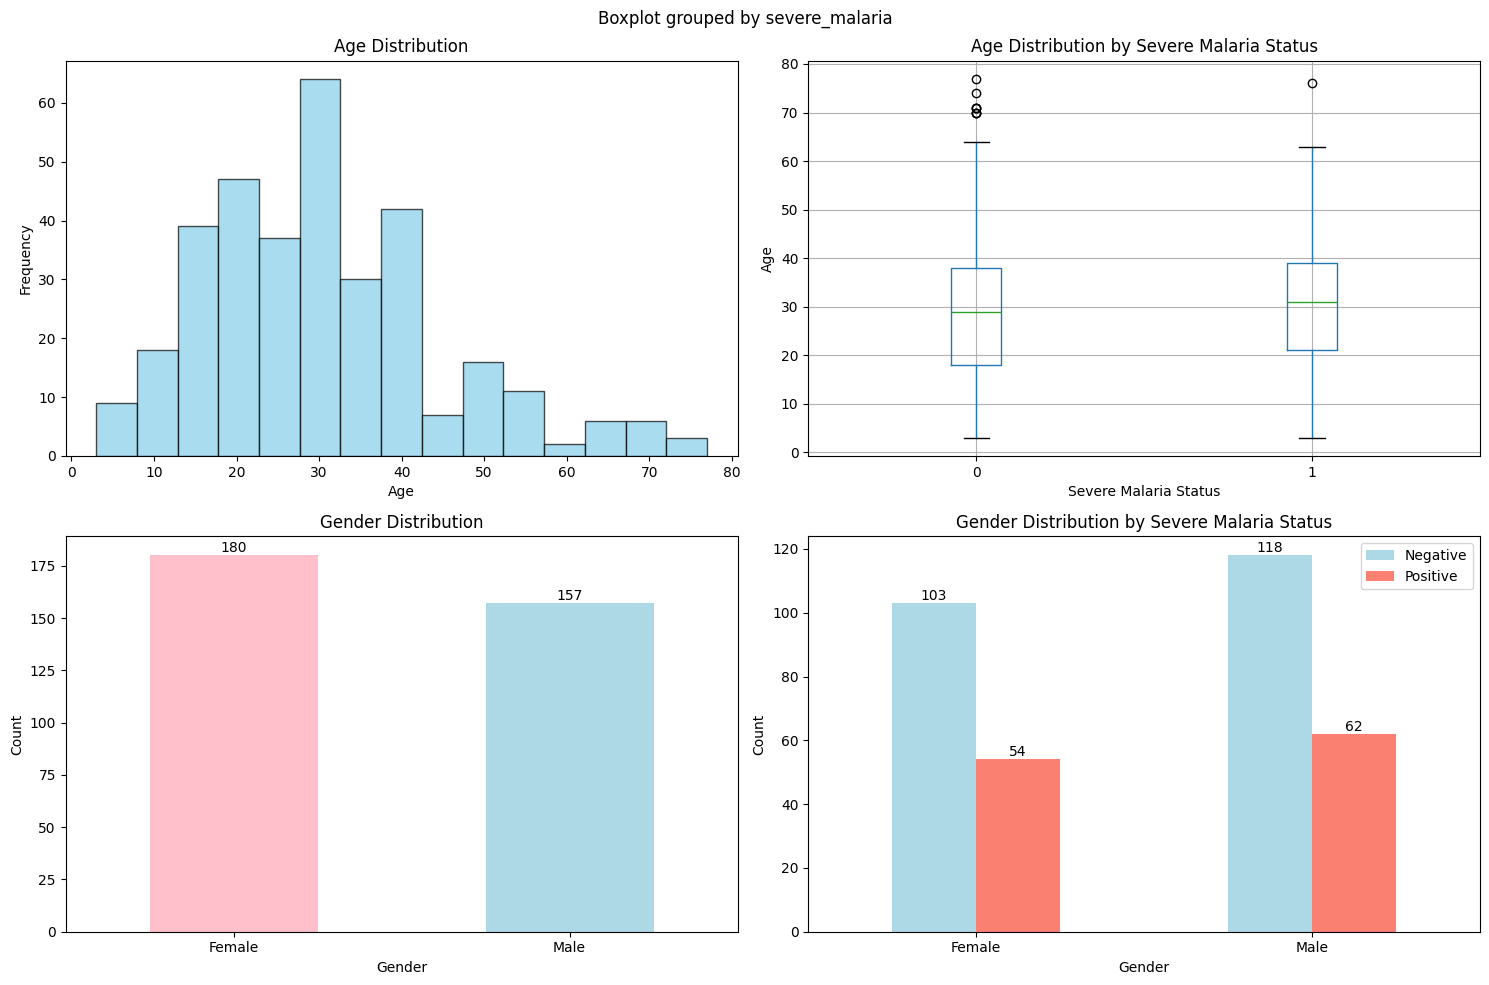

In [38]:
# Create a figure with 4 plots arranged in a 2x2 grid 
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Age distribution (histogram)
axes[0,0].hist(df['age'], bins=15, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Age Distribution')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Frequency')

# 2. Age distribution by malaria status (boxplot)
df.boxplot(column='age', by=target_col, ax=axes[0,1])
axes[0,1].set_title('Age Distribution by Severe Malaria Status')
axes[0,1].set_xlabel('Severe Malaria Status')
axes[0,1].set_ylabel('Age')

# 3. Gender distribution (bar chart)
bars1 = gender_counts.plot(kind='bar', ax=axes[1,0], color=['pink', 'lightblue'])
axes[1,0].set_title('Gender Distribution')
axes[1,0].set_xlabel('Gender')
axes[1,0].set_ylabel('Count')
axes[1,0].set_xticklabels(['Female', 'Male'], rotation=0)

# Add labels on bars (gender counts)
for p in axes[1,0].patches:
    axes[1,0].annotate(f"{int(p.get_height())}",
                       (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom', fontsize=10)

# 4. Gender vs malaria status  (simple comparison table)
gender_target_ct = pd.crosstab(df['sex'], df[target_col])
bars2 = gender_target_ct.plot(kind='bar', ax=axes[1,1], color=['lightblue', 'salmon'])
axes[1,1].set_title('Gender Distribution by Severe Malaria Status')
axes[1,1].set_xlabel('Gender')
axes[1,1].set_ylabel('Count')
axes[1,1].set_xticklabels(['Female', 'Male'], rotation=0)
axes[1,1].legend(['Negative', 'Positive'])

# Add labels on bars (crosstab counts)
for p in axes[1,1].patches:
    axes[1,1].annotate(f"{int(p.get_height())}",
                       (p.get_x() + p.get_width() / 2, p.get_height()),
                       ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [39]:
# Get symptom columns (excluding age, sex, and target)
symptom_cols = [col for col in feature_cols if col not in ['age_group', 'sex', 'age']]
print(f"Number of symptoms analyzed: {len(symptom_cols)}")

# Convert symptom columns to numeric 
for col in symptom_cols:
    if df[col].dtype == 'object':  
        df[col] = df[col].replace({'Yes': 1, 'No': 0, 'Present': 1, 'Absent': 0})
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)



Number of symptoms analyzed: 15


In [40]:
# Calculate symptom frequencies
print("SYMPTOM FREQUENCY ANALYSIS")
print("-" * 30)
symptom_freq = df[symptom_cols].sum().sort_values(ascending=False)
symptom_perc = (symptom_freq / len(df) * 100).round(2)

print("Symptom Frequency (Most to Least Common):")
for i, (symptom, freq) in enumerate(symptom_freq.items(), 1):
    print(f"{i:2d}. {symptom:15s}: {freq:3d} patients ({symptom_perc[symptom]:5.1f}%)")

SYMPTOM FREQUENCY ANALYSIS
------------------------------
Symptom Frequency (Most to Least Common):
 1. hypoglycemia   : 289 patients ( 85.8%)
 2. fever          : 253 patients ( 75.1%)
 3. headace        : 236 patients ( 70.0%)
 4. jundice        : 222 patients ( 65.9%)
 5. cold           : 191 patients ( 56.7%)
 6. cocacola_urine : 182 patients ( 54.0%)
 7. fatigue        : 163 patients ( 48.4%)
 8. bitter_tongue  : 136 patients ( 40.4%)
 9. Anemia         : 118 patients ( 35.0%)
10. Convulsion     : 116 patients ( 34.4%)
11. rigor          : 115 patients ( 34.1%)
12. diarrhea       : 114 patients ( 33.8%)
13. prostraction   :  74 patients ( 22.0%)
14. hyperpyrexia   :  47 patients ( 13.9%)
15. vomitting      :  25 patients (  7.4%)


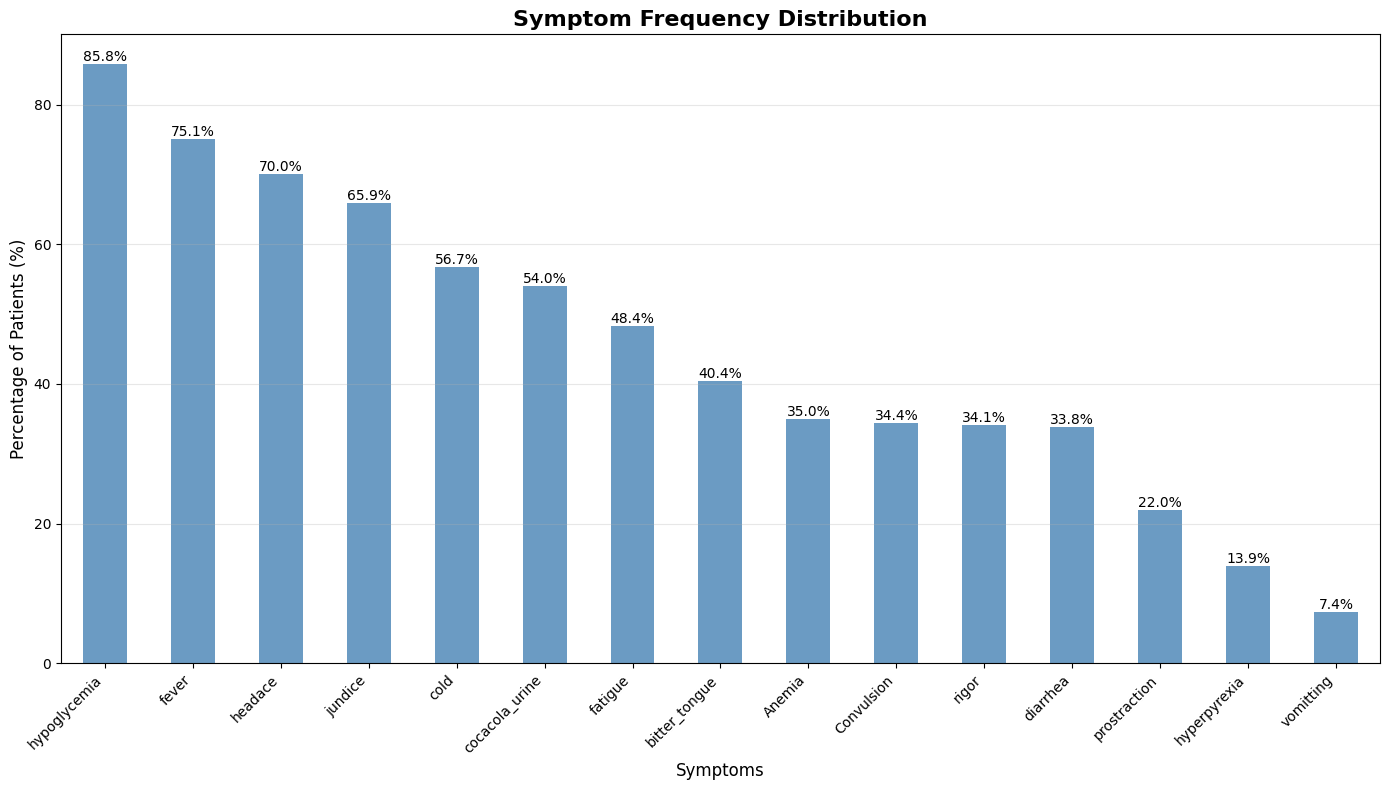

SYMPTOM CORRELATION WITH TARGET


In [41]:
# Visualize symptom frequencies
plt.figure(figsize=(14, 8))
bars = symptom_perc.plot(kind='bar', color='steelblue', alpha=0.8)

plt.title('Symptom Frequency Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Symptoms', fontsize=12)
plt.ylabel('Percentage of Patients (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add labels on top of each bar
for p in bars.patches:
    plt.annotate(f"{p.get_height():.1f}%",  
                 (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

print("SYMPTOM CORRELATION WITH TARGET")


In [42]:
# Calculate correlation between symptoms and target
symptom_target_corr = df[symptom_cols + [target_col]].corr()[target_col].drop(target_col)
symptom_target_corr = symptom_target_corr.sort_values(ascending=False)

print("Symptom Correlation with Severe Malaria (Highest to Lowest):")
for i, (symptom, corr) in enumerate(symptom_target_corr.items(), 1):
    print(f"{i:2d}. {symptom:15s}: {corr:6.3f}")

Symptom Correlation with Severe Malaria (Highest to Lowest):
 1. headace        :  0.147
 2. hypoglycemia   :  0.117
 3. diarrhea       :  0.116
 4. cold           :  0.066
 5. cocacola_urine :  0.055
 6. fatigue        :  0.049
 7. rigor          :  0.032
 8. fever          :  0.013
 9. jundice        :  0.008
10. bitter_tongue  : -0.010
11. vomitting      : -0.014
12. Anemia         : -0.021
13. hyperpyrexia   : -0.021
14. Convulsion     : -0.052
15. prostraction   : -0.113


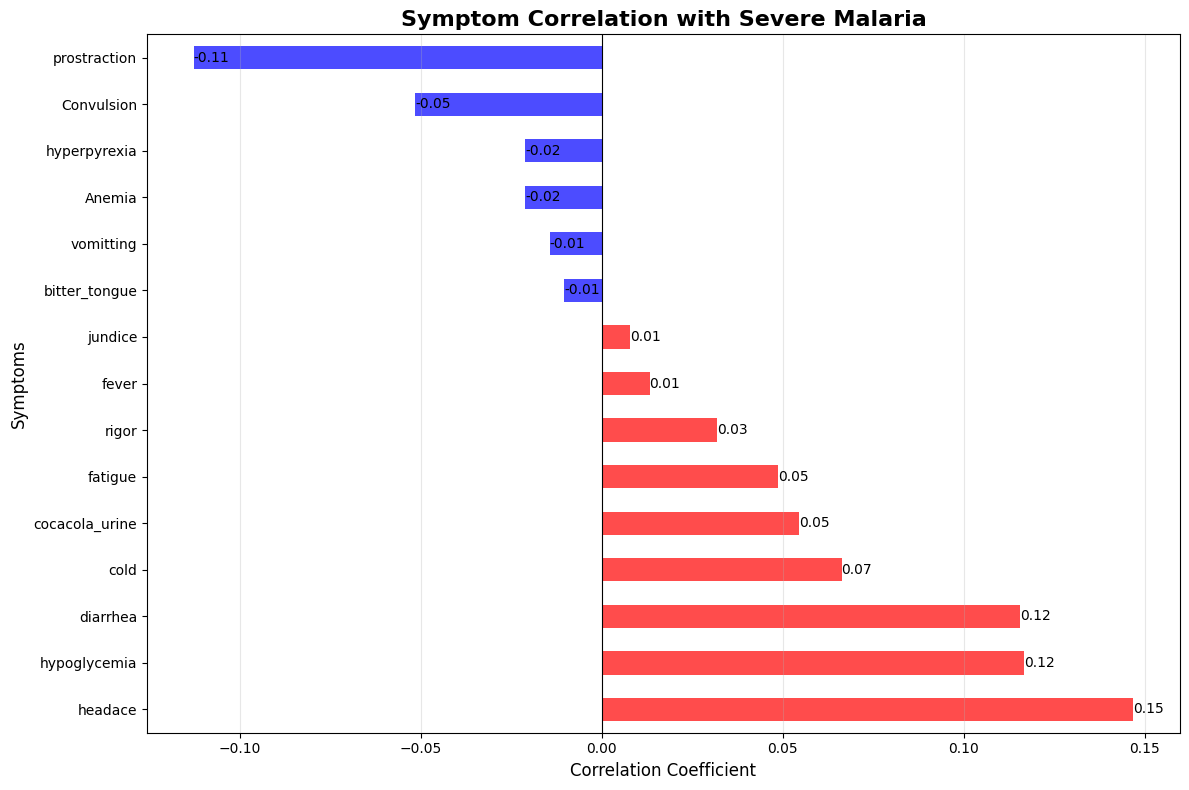

In [43]:
# Visualize correlations
plt.figure(figsize=(12, 8))

# Color bars: red = positive correlation, blue = negative correlation
colors = ['red' if x > 0 else 'blue' for x in symptom_target_corr.values]

bars = symptom_target_corr.plot(kind='barh', color=colors, alpha=0.7)

plt.title('Symptom Correlation with Severe Malaria', fontsize=16, fontweight='bold')
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Symptoms', fontsize=12)
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8) 
plt.grid(axis='x', alpha=0.3)

# Add labels at the end of each bar
for p in bars.patches:
    plt.annotate(f"{p.get_width():.2f}",  # to 2 dp
                 (p.get_width(), p.get_y() + p.get_height() / 2),
                 ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


In [44]:
# Next -- We will train different machine learning models 
# (Logistic Regression, Decision Tree, Random Forest) 
# to help predict if a patient has severe malaria. 
# Since the dataset has more "negative" cases than "positive" ones, 
# we use a method called SMOTE to balance it. 
# We also test the models with cross-validation to check how reliable they are.

In [45]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (classification_report, confusion_matrix, roc_auc_score, 
                           roc_curve, precision_recall_curve, accuracy_score,
                           precision_score, recall_score, f1_score)
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif


In [46]:
# Set random state for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [47]:
# Create comprehensive sample dataset (expanding the original sample)
def create_extended_malaria_dataset(n_samples=337):
    """Create an extended malaria dataset for demonstration"""
    np.random.seed(RANDOM_STATE)
    
    # Base symptoms and their probabilities for different scenarios
    symptoms = ['fever', 'cold', 'rigor', 'fatigue', 'headace', 'bitter_tongue', 
                'vomitting', 'diarrhea', 'Convulsion', 'Anemia', 'jundice', 
                'cocacola_urine', 'hypoglycemia', 'prostraction', 'hyperpyrexia']
    
    data = []
    
    for i in range(n_samples):
        # Generate age (3-77 range as per original data)
        age = np.random.randint(3, 78)
        
        # Generate sex (0=female, 1=male)
        sex = np.random.randint(0, 2)
        
        # Create realistic symptom patterns
        # Severe malaria cases (30% of data)
        if i < n_samples * 0.3:
            severe_malaria = 1
            # Higher probability of severe symptoms
            symptoms_prob = [0.95, 0.8, 0.7, 0.9, 0.8, 0.4, 0.3, 0.4, 0.2, 0.5, 0.3, 0.2, 0.3, 0.4, 0.15]
        else:
            severe_malaria = 0
            # Lower probability of severe symptoms
            symptoms_prob = [0.8, 0.6, 0.5, 0.7, 0.6, 0.2, 0.15, 0.2, 0.05, 0.2, 0.05, 0.03, 0.1, 0.15, 0.02]
        
        # Generate symptoms based on probabilities
        patient_symptoms = [1 if np.random.random() < prob else 0 for prob in symptoms_prob]
        
        # Create patient record
        patient = [age, sex] + patient_symptoms + [severe_malaria]
        data.append(patient)
    
    # Create DataFrame
    columns = ['age', 'sex'] + symptoms + ['severe_malaria']
    df = pd.DataFrame(data, columns=columns)
    
    return df


In [48]:
# Generate dataset
df = create_extended_malaria_dataset(337)
print(f" Dataset created: {df.shape[0]} patients, {df.shape[1]} features")

 Dataset created: 337 patients, 18 features


In [49]:
#FEATURE ENGINEERING

df_engineered = df.copy()

# Age groups
def categorize_age(age):
    if age <= 12:
        return 0  # Child
    elif age <= 30:
        return 1  # Youth
    else:
        return 2  # Adult

df_engineered['age_group'] = df_engineered['age'].apply(categorize_age)

# Symptom counts and scores
symptom_cols = ['fever', 'cold', 'rigor', 'fatigue', 'headace', 'bitter_tongue',
                'vomitting', 'diarrhea', 'Convulsion', 'Anemia', 'jundice',
                'cocacola_urine', 'hypoglycemia', 'prostraction', 'hyperpyrexia']

df_engineered['symptom_count'] = df_engineered[symptom_cols].sum(axis=1)

# Severity score (severe symptoms)
severe_symptoms = ['jundice', 'hyperpyrexia', 'Convulsion', 'cocacola_urine']
df_engineered['severity_score'] = df_engineered[severe_symptoms].sum(axis=1)

# GI symptoms
gi_symptoms = ['vomitting', 'diarrhea', 'bitter_tongue']
df_engineered['gi_symptoms'] = df_engineered[gi_symptoms].sum(axis=1)

# Neurological symptoms
neuro_symptoms = ['headace', 'Convulsion']
df_engineered['neuro_symptoms'] = df_engineered[neuro_symptoms].sum(axis=1)

# Interaction features
df_engineered['age_symptom_interaction'] = df_engineered['age'] * df_engineered['symptom_count']
df_engineered['fever_severity'] = df_engineered['fever'] * df_engineered['severity_score']

print(f" Total features: {df_engineered.shape[1] - 1} (excluding target)")

# Prepare features and target
X = df_engineered.drop(['severe_malaria'], axis=1)
y = df_engineered['severe_malaria']

print(f"\nDataset Summary:")
print(f"  Samples: {X.shape[0]}")
print(f"  Features: {X.shape[1]}")
print(f"  Target distribution: {dict(y.value_counts())}")

 Total features: 24 (excluding target)

Dataset Summary:
  Samples: 337
  Features: 24
  Target distribution: {0: 235, 1: 102}


In [50]:
from imblearn.over_sampling import SMOTE

In [51]:
# TRAIN-TEST SPLIT AND DATA PREPROCESSING
# Stratified split to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=RANDOM_STATE)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print(f"\nAfter SMOTE balancing:")
print(f"  Training samples: {X_train_balanced.shape[0]}")
print(f"  Balanced target distribution: {dict(pd.Series(y_train_balanced).value_counts())}")



After SMOTE balancing:
  Training samples: 376
  Balanced target distribution: {0: 188, 1: 188}


In [52]:
# BASELINE MODEL BUILDING
# Initialize results storage
results = {}
models = {}

In [53]:
# LOGISTIC REGRESSION MODEL

# Train Logistic Regression
lr_model = LogisticRegression(random_state=RANDOM_STATE, max_iter=1000)
lr_model.fit(X_train_balanced, y_train_balanced)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Store model
models['Logistic Regression'] = lr_model

print("Logistic Regression trained successfully")

# Calculate metrics
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)
lr_auc = roc_auc_score(y_test, y_pred_proba_lr)

# Store results
results['Logistic Regression'] = {
    'accuracy': lr_accuracy,
    'precision': lr_precision,
    'recall': lr_recall,
    'f1_score': lr_f1,
    'roc_auc': lr_auc
}

print(f"Accuracy:  {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall:    {lr_recall:.4f}")
print(f"F1-Score:  {lr_f1:.4f}")
print(f"ROC-AUC:   {lr_auc:.4f}")

# Feature importance
feature_importance_lr = pd.DataFrame({
    'feature': X.columns,
    'coefficient': lr_model.coef_[0],
    'abs_coefficient': np.abs(lr_model.coef_[0])
}).sort_values('abs_coefficient', ascending=False)

print(f"\nTop 10 Most Important Features (Logistic Regression):")
for i, row in feature_importance_lr.head(10).iterrows():
    print(f"  {row['feature']:20s}: {row['coefficient']:6.3f}")

# Cross-validation
cv_scores_lr = cross_val_score(lr_model, X_train_balanced, y_train_balanced, cv=5)
print(f"\n5-Fold Cross-Validation Accuracy: {cv_scores_lr.mean():.4f} (±{cv_scores_lr.std()*2:.4f})")

Logistic Regression trained successfully
Accuracy:  0.8676
Precision: 0.7500
Recall:    0.8571
F1-Score:  0.8000
ROC-AUC:   0.9321

Top 10 Most Important Features (Logistic Regression):
  cold                :  1.030
  symptom_count       :  0.948
  fatigue             :  0.698
  Anemia              :  0.589
  severity_score      :  0.569
  jundice             :  0.557
  hyperpyrexia        :  0.433
  fever               :  0.423
  age_group           :  0.379
  hypoglycemia        :  0.375

5-Fold Cross-Validation Accuracy: 0.8406 (±0.1286)


In [54]:
# DECISION TREE MODEL

dt_model = DecisionTreeClassifier(
    random_state=RANDOM_STATE,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5
)
dt_model.fit(X_train_balanced, y_train_balanced)

# Predictions
y_pred_dt = dt_model.predict(X_test_scaled)
y_pred_proba_dt = dt_model.predict_proba(X_test_scaled)[:, 1]

# Store model
models['Decision Tree'] = dt_model

print(" Decision Tree trained successfully")

# Calculate metrics
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)
dt_auc = roc_auc_score(y_test, y_pred_proba_dt)

# Store results
results['Decision Tree'] = {
    'accuracy': dt_accuracy,
    'precision': dt_precision,
    'recall': dt_recall,
    'f1_score': dt_f1,
    'roc_auc': dt_auc
}

print(f"Accuracy:  {dt_accuracy:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall:    {dt_recall:.4f}")
print(f"F1-Score:  {dt_f1:.4f}")
print(f"ROC-AUC:   {dt_auc:.4f}")

# Feature importance
feature_importance_dt = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nTop 10 Most Important Features (Decision Tree):")
for i, row in feature_importance_dt.head(10).iterrows():
    print(f"  {row['feature']:20s}: {row['importance']:6.3f}")

# Cross-validation
cv_scores_dt = cross_val_score(dt_model, X_train_balanced, y_train_balanced, cv=5)
print(f"\n5-Fold Cross-Validation Accuracy: {cv_scores_dt.mean():.4f} (±{cv_scores_dt.std()*2:.4f})")


 Decision Tree trained successfully
Accuracy:  0.8088
Precision: 0.7222
Recall:    0.6190
F1-Score:  0.6667
ROC-AUC:   0.8916

Top 10 Most Important Features (Decision Tree):
  symptom_count       :  0.730
  hyperpyrexia        :  0.062
  rigor               :  0.046
  age                 :  0.034
  vomitting           :  0.022
  severity_score      :  0.020
  age_symptom_interaction:  0.017
  neuro_symptoms      :  0.014
  headace             :  0.013
  hypoglycemia        :  0.013

5-Fold Cross-Validation Accuracy: 0.8115 (±0.1558)


In [55]:
#  RANDOM FOREST MODEL

# Hyperparameter tuning for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, None],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 5]
}

rf_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=RANDOM_STATE),
    rf_param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=1
)

rf_grid_search.fit(X_train_balanced, y_train_balanced)
rf_model = rf_grid_search.best_estimator_

print(f" Best parameters: {rf_grid_search.best_params_}")
print(f" Best CV score: {rf_grid_search.best_score_:.4f}")

# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Store model
models['Random Forest'] = rf_model

print("\n5.2 MODEL EVALUATION")
print("-" * 20)

# Calculate metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, y_pred_proba_rf)

# Store results
results['Random Forest'] = {
    'accuracy': rf_accuracy,
    'precision': rf_precision,
    'recall': rf_recall,
    'f1_score': rf_f1,
    'roc_auc': rf_auc
}

print(f"Accuracy:  {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall:    {rf_recall:.4f}")
print(f"F1-Score:  {rf_f1:.4f}")
print(f"ROC-AUC:   {rf_auc:.4f}")

# Feature importance
feature_importance_rf = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nTop 10 Most Important Features (Random Forest):")
for i, row in feature_importance_rf.head(10).iterrows():
    print(f"  {row['feature']:20s}: {row['importance']:6.3f}")

 Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
 Best CV score: 0.9512

5.2 MODEL EVALUATION
--------------------
Accuracy:  0.9265
Precision: 0.8636
Recall:    0.9048
F1-Score:  0.8837
ROC-AUC:   0.9382

Top 10 Most Important Features (Random Forest):
  symptom_count       :  0.276
  age_symptom_interaction:  0.089
  fever_severity      :  0.081
  severity_score      :  0.080
  Anemia              :  0.052
  age                 :  0.048
  jundice             :  0.045
  hypoglycemia        :  0.042
  cold                :  0.039
  gi_symptoms         :  0.035


In [56]:
# Machine Learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Model selection and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    roc_auc_score, roc_curve, precision_recall_curve,
    classification_report, confusion_matrix
)

In [57]:
# Handling class imbalance
from imblearn.over_sampling import SMOTE

# Saving/loading models
import joblib

In [58]:
# Change words (like "Male", "Female", "Yes", "No") into numbers the computer can understand
df = pd.get_dummies(df, drop_first=True)

In [59]:
# 3. Separate features & target
# Features = symptoms & patient info 
# Target = malaria result
target_column = "severe_malaria"  
X = df.drop(target_column, axis=1)   # everything except target
y = df[target_column]                # only target column

In [60]:
# 4. Train/test split
# Split data into training (to teach model) and testing (to check accuracy later)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Put all numbers on the same scale 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
#  Gradient Boosting Tuning

#  Trying different settings to see which Gradient Boosting model works best
gb_param_grid = {
    'n_estimators': [100, 200],  # number of trees
    'learning_rate': [0.05, 0.1], # how fast the model learns
    'max_depth': [3, 5]           # how deep each tree goes
}

In [63]:
# GridSearchCV = tries all combinations above and picks the best
gb_grid = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    gb_param_grid,
    cv=3,              # split training data into 3 parts to test
    scoring='roc_auc', # metric to score model
    n_jobs=1           # 1 = avoid parallel errors on some machines
)
gb_grid.fit(X_train, y_train)  # Train
best_gb = gb_grid.best_estimator_  # Keep best version

print("\nGradient Boosting Best Params:", gb_grid.best_params_)
print("Gradient Boosting Best CV AUC:", gb_grid.best_score_)


Gradient Boosting Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Gradient Boosting Best CV AUC: 0.9001487624172809


In [64]:
# Next is to try out same thing we did for Gradient boosting for XBOOST. XGBOOST is an advanced boosting algorithm

In [65]:
# XGBoost Tuning

xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],        # use part of data for each tree
    'colsample_bytree': [0.8, 1.0]  # use part of features for each tree
}

xgb_grid = GridSearchCV(
    XGBClassifier(
        random_state=42,
        use_label_encoder=False, # avoid warning
        eval_metric='logloss'    # metric for evaluation
    ),
    xgb_param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=1
)
xgb_grid.fit(X_train, y_train)   # 👉 Train
best_xgb = xgb_grid.best_estimator_

print("\nXGBoost Best Params:", xgb_grid.best_params_)
print("XGBoost Best CV AUC:", xgb_grid.best_score_)



XGBoost Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
XGBoost Best CV AUC: 0.9210438053030646


In [66]:
# Compare all the models we used side by side 
models = [
    ("Logistic Regression", LogisticRegression(max_iter=500)),  
    ("Decision Tree", DecisionTreeClassifier(random_state=42)), 
    ("Random Forest", RandomForestClassifier(random_state=42)), 
    ("Gradient Boosting", best_gb),   
    ("XGBoost", best_xgb)             
]
model_results = []

In [67]:
# Training each model on the  training dataset and test it
for name, model in models:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)              # predicted classes (yes/no malaria)
    proba = model.predict_proba(X_test)[:, 1]  # predicted probabilities
    
    acc = accuracy_score(y_test, preds)  # how often is it correct
    f1 = f1_score(y_test, preds)         # balance between precision & recall
    auc = roc_auc_score(y_test, proba)   # how well it ranks positives vs negatives
    
    model_results.append({
        "Model": name,
        "Accuracy": acc,
        "F1 Score": f1,
        "ROC-AUC": auc
    })

In [68]:
# Sort results from best to worst by AUC Score. AUC tells you how good your model is at ranking in this case, people with severe malaria and people without
results_df = pd.DataFrame(model_results)
results_df = results_df.sort_values(by="ROC-AUC", ascending=False)
print("\nModel Comparison:")
print(results_df)


Model Comparison:
                 Model  Accuracy  F1 Score   ROC-AUC
3    Gradient Boosting  0.794118  0.650000  0.867633
0  Logistic Regression  0.794118  0.681818  0.863768
4              XGBoost  0.764706  0.578947  0.857971
2        Random Forest  0.808824  0.682927  0.851691
1        Decision Tree  0.705882  0.523810  0.650242


In [69]:
# Pick best model from result
best_row = results_df.iloc[0]
best_model_name = best_row["Model"]
best_model = dict(models)[best_model_name]

print(f"\nBest Model: {best_model_name}")


Best Model: Gradient Boosting


In [70]:
joblib.dump(model, "severe_malaria_prediction_app.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [71]:
print(df.columns.tolist())

['age', 'sex', 'fever', 'cold', 'rigor', 'fatigue', 'headace', 'bitter_tongue', 'vomitting', 'diarrhea', 'Convulsion', 'Anemia', 'jundice', 'cocacola_urine', 'hypoglycemia', 'prostraction', 'hyperpyrexia', 'severe_malaria']


In [72]:
print(scaler.n_features_in_)


17


In [73]:
import streamlit as st
import joblib
import numpy as np

# Load model and scaler
model = joblib.load('severe_malaria_prediction_app.pkl')
scaler = joblib.load('scaler.pkl')

st.title("🦟 Malaria Prediction App")

# Collect inputs from user
age = st.number_input("Age", 1, 100)
sex = st.selectbox("Gender", ["Female", "Male"])
fever = st.selectbox("Fever", ["No", "Yes"])
cold = st.selectbox("Cold", ["No", "Yes"])
rigor = st.selectbox("Rigor", ["No", "Yes"])
fatigue = st.selectbox("Fatigue", ["No", "Yes"])
headace = st.selectbox("Headache", ["No", "Yes"])
bitter_tongue = st.selectbox("Bitter Tongue", ["No", "Yes"])
vomitting = st.selectbox("Vomiting", ["No", "Yes"])
diarrhea = st.selectbox("Diarrhea", ["No", "Yes"])
Convulsion = st.selectbox("Convulsion", ["No", "Yes"])
Anemia = st.selectbox("Anemia", ["No", "Yes"])
jundice = st.selectbox("Jaundice", ["No", "Yes"])
cocacola_urine = st.selectbox("Coca-Cola Urine", ["No", "Yes"])
hypoglycemia = st.selectbox("Hypoglycemia", ["No", "Yes"])
prostraction = st.selectbox("Prostration", ["No", "Yes"])
hyperpyrexia = st.selectbox("Hyperpyrexia", ["No", "Yes"])

if st.button("Predict"):
    # Convert categorical inputs to numeric
    sex = 0 if sex == "Female" else 1
    fever = 1 if fever == "Yes" else 0
    cold = 1 if cold == "Yes" else 0
    rigor = 1 if rigor == "Yes" else 0
    fatigue = 1 if fatigue == "Yes" else 0
    headace = 1 if headace == "Yes" else 0
    bitter_tongue = 1 if bitter_tongue == "Yes" else 0
    vomitting = 1 if vomitting == "Yes" else 0
    diarrhea = 1 if diarrhea == "Yes" else 0
    Convulsion = 1 if Convulsion == "Yes" else 0
    Anemia = 1 if Anemia == "Yes" else 0
    jundice = 1 if jundice == "Yes" else 0
    cocacola_urine = 1 if cocacola_urine == "Yes" else 0
    hypoglycemia = 1 if hypoglycemia == "Yes" else 0
    prostraction = 1 if prostraction == "Yes" else 0
    hyperpyrexia = 1 if hyperpyrexia == "Yes" else 0


    # Arrange features in correct order by copying our result from print(X.columns.tolist())
    features = np.array([[age, sex, fever, cold, rigor, fatigue, headace,
                          bitter_tongue, vomitting, diarrhea, Convulsion, Anemia,
                          jundice, cocacola_urine, hypoglycemia, prostraction,
                          hyperpyrexia]])
    
    # Scale and predict
    features_scaled = scaler.transform(features)
    prediction = model.predict(features_scaled)[0]

    # Display result
    st.success("✅ Positive for Severe Malaria" if prediction == 1 else "❌ Negative for Severe Malaria")

2025-08-21 15:35:00.063 
  command:

    streamlit run C:\Users\idowu\st_env\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
